# Os vídeo games de sucesso

Estou analisando os dados de venda de videogame da loja online ICE. Os dados contêm as avaliações de usuários e especialistas, gêneros, plataformas e dados históricos sobre vendas de jogos. Eu quero **identificar padrões que determinam se um jogo tem sucesso ou não**. Com isso, poderei identificar fatores que possam orientar futuras campanhas publicitárias. Eu focarei na identificação de padrões que possam orientar as campanhas publicitárias em 2017.

## Importando bibliotecas e os dados

In [1]:
# bibliotecas
import pandas as pd
import numpy as np
import math
import statistics as sts
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
# importando dados
try:
    games = pd.read_csv('games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

## Preparando os dados

### Estudando os dados

In [3]:
#visualizando dados
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# tipos de dados
games.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 16715 entries, 0 to 16714

Data columns (total 11 columns):

 #   Column           Non-Null Count  Dtype  

---  ------           --------------  -----  

 0   Name             16713 non-null  object 

 1   Platform         16715 non-null  object 

 2   Year_of_Release  16446 non-null  float64

 3   Genre            16713 non-null  object 

 4   NA_sales         16715 non-null  float64

 5   EU_sales         16715 non-null  float64

 6   JP_sales         16715 non-null  float64

 7   Other_sales      16715 non-null  float64

 8   Critic_Score     8137 non-null   float64

 9   User_Score       10014 non-null  object 

 10  Rating           9949 non-null   object 

dtypes: float64(6), object(5)

memory usage: 1.4+ MB


In [5]:
# verificando dados faltantes
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# verificando duplicatas
games.duplicated().sum()

0

**Comentário**: O nome das variáveis está em caixa alta, o que é pouco intuitivo pra leitura. A variável `User_Score` está com tipagem errada, tipo object. Além disso, temos dados faltantes em `name`, `Year_of_Release`, `genre`, `Critic_Score`, `User_Score`, e `Rating`. Aparentemente não temos duplicadas, mas os dados faltantes podem esconder linhas que seriam entradas repetidas.

### Mudando nomes e tipagem das variáveis

#### Mudando nome das variáveis

In [7]:
# nomes de colunas com caixa baixa
games.columns= games.columns.str.lower()

In [8]:
# simplificando nome de 'year_of_release'
games.rename(columns={"year_of_release": "year"}, inplace=True)

In [9]:
# verificando mudanças
games.columns

Index(['name', 'platform', 'year', 'genre', 'na_sales', 'eu_sales', 'jp_sales',
       'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Comentário**: Mudei o nome das variáveis para caixa baixa. Também mudei `year_of_release` para `year`. 

#### Mudando tipagem das variáveis

In [10]:
# verificando tipos de valores em `user_score`
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
# convertendo 'to be determined' em 'nan'
games['user_score']= games['user_score'].replace(to_replace='tbd', value='nan')

In [12]:
# convertendo tipo de 'user_score' 
games['user_score'] = games['user_score'].astype('float64')

**Comentário**: Mudei o tipo de dados de `user_score` para flutuante. Para isso, tive que substituir valores não numéricos por nan (not a number).

### Tratando variáveis com dados faltantes

#### Variável `name`

In [13]:
# quantos nomes faltantes?
games['name'].isnull().sum()

2

In [14]:
# retirando faltantes
games = games[~(games['name'].isnull())]

**Comentário**: Apenas retirei as entradas sem nome, visto que eram poucas e não permetiriam identificar um jogo de sucesso.

#### Variável `year`

In [15]:
# quantas dados faltantes?
games['year'].isnull().sum()

269

In [16]:
# retirando dados faltantes
games = games[~(games['year'].isnull())]

**Comentário**: A variável `year` possuia uma pequena quantidade de dados faltantes que não poderiam ser inferidos. Logo, eles foram retirados.

#### Variável `genre`

In [17]:
# quantas dados faltantes?
games['genre'].isnull().sum()

0

**Comentário**: tudo OK!

#### Variáveis de avaliação dos jogos: `critic_score`, `user_score` e `rating`

In [18]:
# vendo a quantidade de dados faltantes nas variáveis de interesse
games[['critic_score', 'user_score', 'rating']].isnull().sum()

critic_score    8461
user_score      8981
rating          6676
dtype: int64

**Comentário**: Essas variáveis possuem um número considerável de dados faltantes. É preferível algum tipo de tratamento para substituir os dados faltantes e manter o máximo de entradas. Em seguida exploro padrões das variáveis para tentar achar meios de substituição dos dados faltantes.

##### Distribuição das variáveis de avaliação dos jogos

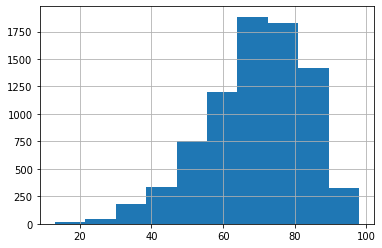

In [19]:
games['critic_score'].hist()
plt.show()

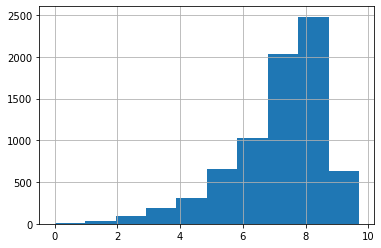

In [20]:
games['user_score'].hist()
plt.show()

In [21]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

**Comentário**: As distribuições de `critic_score` e `user_score`são assimétricas, logo a mediana é a melhor estatística de centro. A variável `rating` possui quatro categorias frequentes e quatro categorias raras.

##### Relação entre variáveis de availação dos jogos

In [22]:
# correlação entre scores da crítica e do usuários
games[['critic_score', 'user_score']].corr()

,critic_score,user_score
critic_score,1.000000,0.579671
user_score,0.579671,1.000000


**Comentário**: Correlação considerável entre variáveis de score

In [23]:
# mediana dos scores por categoria de `rating`
games.groupby(['rating'])[['user_score', 'critic_score']].median()

,user_score,critic_score
rating,,
AO,8.6,93.0
E,7.5,70.0
E10+,7.1,68.0
EC,7.0,NaN
K-A,8.1,92.0
M,7.5,74.0
RP,6.8,63.0
T,7.6,71.0


**Comentátio**: A variáveis `critic_score` e `user_score` possuem uma correlação considerável, logo elas contêm uma informação similar sobre a avaliação dos jogos. Essa correlação é observada ao longo das categorias de `rating`, mostrando que os scores refletem em certa medida a categorização técnica, mas nem sempre de forma consistente. O número de entradas com dados faltantes em `critic_score` e `rating` é maior do que em `user_score`, possivelmente por que é mais fácil coletar a opinião dos clientes do que esperar métricas especializadas. 

Eu vou preencher os dados faltantes de `critic_score`,  `user_score` e `rating` a partir dos valores comuns a fim de manter a estrutura de correlação observada.

##### Tratando dados faltantes de `critic_score`

In [24]:
# visualizando mediana de sucesso por gênero de jogo
games.groupby(['genre'])['critic_score'].median()

genre
Action          68.0
Adventure       66.0
Fighting        72.0
Misc            69.0
Platform        69.5
Puzzle          70.0
Racing          69.0
Role-Playing    74.0
Shooter         73.0
Simulation      70.0
Sports          75.0
Strategy        73.0
Name: critic_score, dtype: float64

In [25]:
# susbtituindo dados faltantes
games['critic_score'] = games['critic_score'].fillna(games.groupby(['genre'])['critic_score'].transform('median'))

**Comentário**: Os scores medianos são bem similares ao longo dos gêneros de jogo. Logo, utilizei o gênero do jogo para substituir os dados faltantes dos scores para evitar grandes modificações na estrutura dos dados.

##### Tratando dados faltantes de `user_score`

In [26]:
# visualizando mediana de sucesso por gênero de jogo
games.groupby(['genre'])['user_score'].median()

genre
Action          7.4
Adventure       7.6
Fighting        7.6
Misc            7.1
Platform        7.7
Puzzle          7.5
Racing          7.4
Role-Playing    7.8
Shooter         7.4
Simulation      7.5
Sports          7.4
Strategy        7.8
Name: user_score, dtype: float64

In [27]:
# susbtituindo dados faltantes
games['user_score'] = games['user_score'].fillna(games.groupby(['genre'])['user_score'].transform('median'))

**Comentário**: Os scores medianos são bem similares ao longo dos gêneros de jogo. Logo, utilizei o gênero do jogo para substituir os dados faltantes dos scores para evitar grandes modificações na estrutura dos dados.

##### Tratando dados faltantes de `rating`

In [28]:
# definindo função para indicar valor mais comum de 'rating'
def genre_to_rating(x):
    rating_counts = x.value_counts()
    boolean = (rating_counts == max(rating_counts))
    index = rating_counts.index.values[boolean][0]
    return index

In [29]:
# susbtituindo dados faltantes
games['rating'] = games['rating'].fillna(games.groupby(['genre'])['rating'].transform(lambda x: genre_to_rating(x)) )

**Comentário**: Subtitui os dados faltantes de `rating` pela categoria mais comum por cada gênero de jogo.

In [30]:
# visualizando as variáveis após tratamento
games.groupby(['rating'])[['user_score', 'critic_score']].median()

,user_score,critic_score
rating,,
AO,8.6,93.0
E,7.4,69.0
E10+,7.4,69.0
EC,7.1,69.0
K-A,8.1,73.0
M,7.4,73.0
RP,6.8,63.0
T,7.6,72.0


**Comentário**: A estrutura de correlação entre as variáveis de avaliação dos jogos foi pouco alterada após o tratemento dos dados faltantes. Logo, as substituições deixaram viáveis um maior número de entradas, alterando pouco a informação dos dados originais.

### Enriquecendo os dados

In [31]:
# calculando venda total por jogo
total_sales = games[['na_sales' , 'eu_sales', 'jp_sales', 'other_sales']].apply(sum, axis=1)

In [32]:
# inserindo venda total
games.insert(loc=8 , column= 'total_sales', value=total_sales)

In [33]:
# visualizar
games.head()

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,69.5,7.7,E
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.38,74.0,7.8,T


## Analisando os dados

In [34]:
# definindo função para gráfico de barras rápido
def fast_bar_plot(df, index, var, func, fig_size, xlabel='', ylabel=''):
    pivot_df = pd.pivot_table(df, index=index, values= var, aggfunc= func, fill_value= 0)
    plt.figure(figsize=fig_size)
    plt.bar(x=pivot_df.index.values, height= pivot_df[var].values, alpha=0.5)
    plt.xlabel(xlabel=xlabel, fontsize=18)
    plt.ylabel(ylabel=ylabel, fontsize=18)
    plt.show()

### Analisando lançamentos de jogos por ano

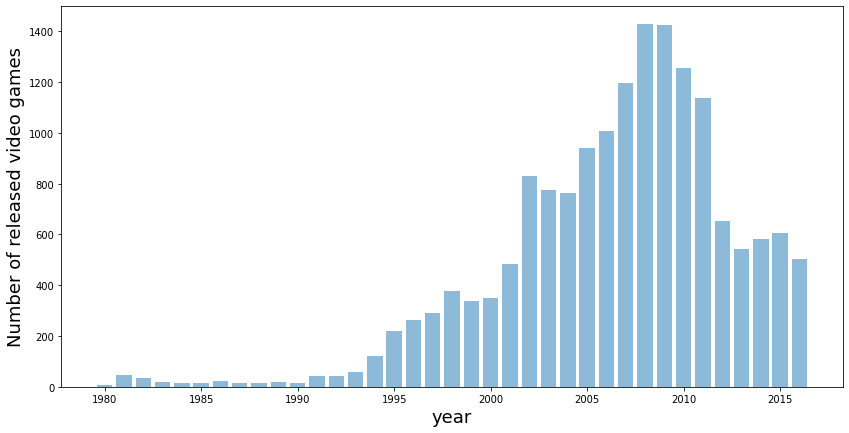

In [35]:
# gráfico de barras
fast_bar_plot(df=games, index='year', var='name', func= len,xlabel='year', ylabel= "Number of released video games", fig_size= (14,7))

**Comentário**: Uma maior quantidade de jogos foi lançada em 2008 e 2009, com uma descescente quantidade tanto pata anos anteriores quanto posteriores

### Analisando vendas por plataforma

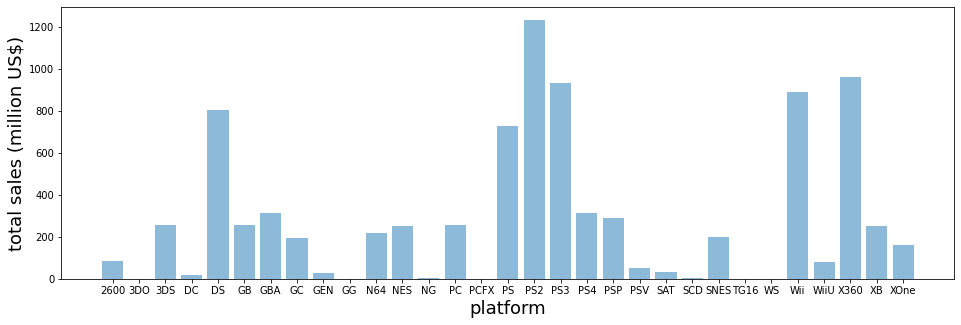

In [36]:
# gráfico de barras
fast_bar_plot(df=games, index='platform', var="total_sales", func= np.sum, xlabel='platform', ylabel= 'total sales (million US$)',fig_size= (16,5))

In [37]:
most_sold_platforms = ['PS2', 'PS3', 'X360']

**Comentário**: As plataformas com o maior acúmulo de vendas são PS2, PS3 e X360

#### Analisando vendas por ano das plataformas mais vendidas

In [38]:
# selecionando plataformas mais vendidas
most_plt_games = games.query("platform in @most_sold_platforms")

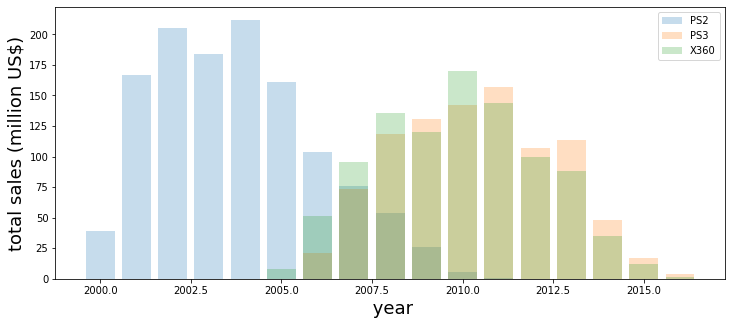

In [39]:
# gráfico de barras das vendas das plataformas mais vendidas ao longo dos anos.
var = 'total_sales'
pivot_df = pd.pivot_table(most_plt_games, index= ['platform', 'year'], values= var, aggfunc= np.sum, fill_value= 0)
plt.figure(figsize=(12,5))
for plat in most_sold_platforms:
    plt.bar(x=pivot_df.loc[plat].index.values, height= pivot_df.loc[plat][var], alpha=0.25, label=plat)
plt.xlabel(xlabel=' year', fontsize=18)
plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
plt.legend(loc='upper right')
plt.show()

**Comentário**: PS2 foi uma plataforma de grande sucesso, com vendas de 2000 a 2010. Posteriormente, as plataformas PS3 e X360 tomaram conta, com vendas de 2005 a 2015. Aparentemente, o tempo de venda das plataformas é cerca de 10 anos. 

### Fatiando os dados para um período de maior relevância

Para orientar as campanhas publicitárias de 2017, decidi estudar os dados entre 2010 a 2015. O tempo de sucesso das plataformas aparentemente dura 10 anos, com ascedência nos cinco primeiro anos. Logo, ao estudar os cinco anos anteriores de 2017, provavelmente terei um maior poder de inferência sobre as tendências em 2017. Eu exclui 2016 do intervalo pois os dados do referido ano podem não estar completos.

In [40]:
# selecionando dados mais recentes
games1 = games.query("year > 2009 and year < 2016")

### Analisando vendas recentes por plataforma

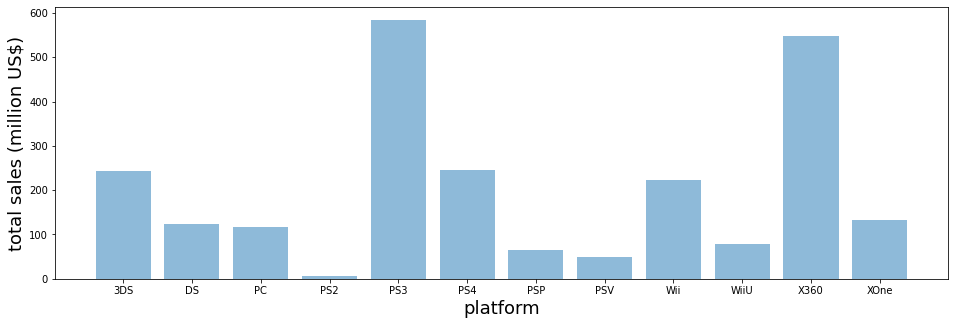

In [41]:
# gráfico de barras
fast_bar_plot(df=games1, index='platform', var="total_sales", func= np.sum, xlabel='platform', ylabel= 'total sales (million US$)',fig_size= (16,5))

In [42]:
# total de vendas por plataforma
most_sold_df = pd.pivot_table(games1, index= ['platform'], values= 'total_sales', aggfunc= np.sum, fill_value= 0).sort_values(by='total_sales', ascending=False)

In [43]:
# visulizar mais vendidos
most_sold_df.head(5)

,total_sales
platform,
PS3,584.14
X360,548.89
PS4,244.89
3DS,242.67
Wii,222.79


In [44]:
# nome das 5 plataformas mais vendidas
platforms_by_sales = most_sold_df.index.values

In [45]:
platforms_by_sales

array(['PS3', 'X360', 'PS4', '3DS', 'Wii', 'XOne', 'DS', 'PC', 'WiiU',
       'PSP', 'PSV', 'PS2'], dtype=object)

**Comentário**: As plataformas com maiores vendas recentes são 'PS3', 'X360', 'PS4', '3DS' e 'XOne'

#### Analisando tendências temporais de vendas das plataformas

In [46]:
def fast_graph(x):
    var = 'total_sales'
    pivot_df = pd.pivot_table(games1, index= ['platform', 'year'], values= var, aggfunc= np.sum, fill_value= 0)
    plt.figure(figsize=(10,5))
    plt.bar(x=pivot_df.loc[x].index.values, height= pivot_df.loc[x][var], alpha=0.25, label=x)
    plt.xlabel(xlabel=' year', fontsize=18)
    plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
    plt.legend(loc='upper right')
    plt.show()

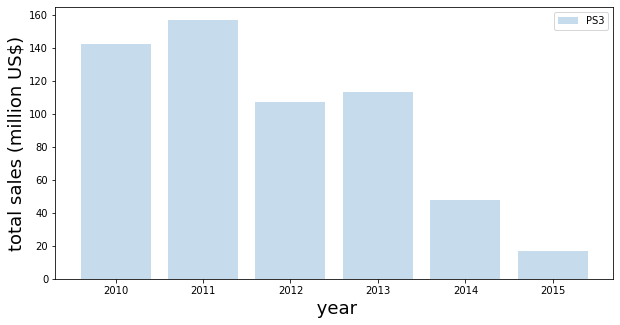

In [47]:
fast_graph(x= platforms_by_sales[0])

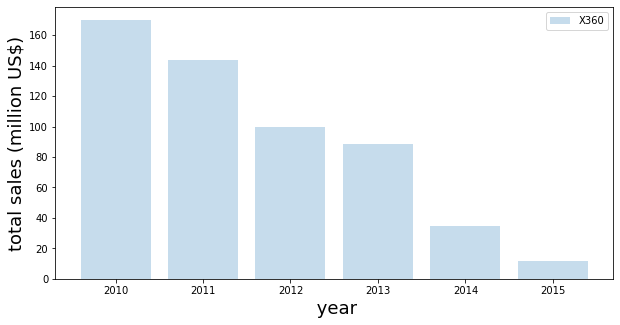

In [48]:
fast_graph(x= platforms_by_sales[1])

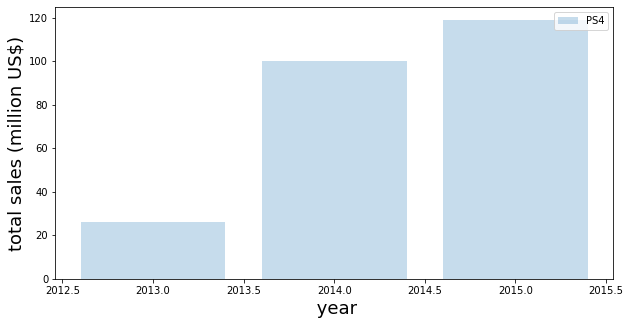

In [49]:
fast_graph(x= platforms_by_sales[2])

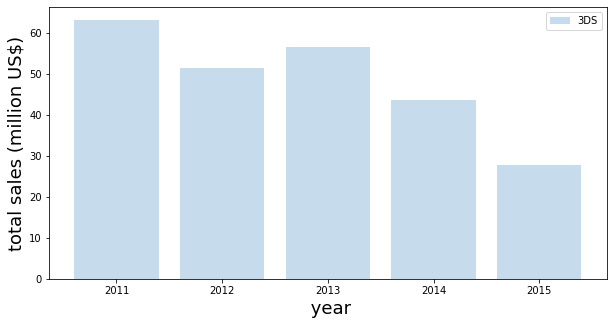

In [50]:
fast_graph(x= platforms_by_sales[3])

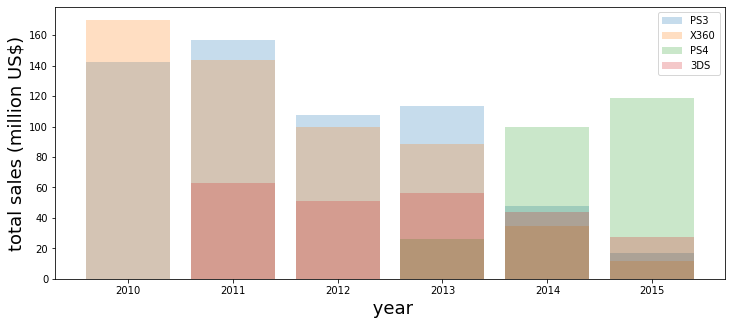

In [51]:
# gráfico de barras das vendas das plataformas mais vendidas ao longo dos anos.
var = 'total_sales'
pivot_df = pd.pivot_table(games1, index= ['platform', 'year'], values= var, aggfunc= np.sum, fill_value= 0)
plt.figure(figsize=(12,5))
for plat in ['PS3', 'X360', 'PS4', '3DS']:
    plt.bar(x=pivot_df.loc[plat].index.values, height= pivot_df.loc[plat][var], alpha=0.25, label=plat)
plt.xlabel(xlabel=' year', fontsize=18)
plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
plt.legend(loc='upper right')
plt.show()

**Comentário**: Das plataformas com maiores vendas recentes, PS3, X360 e 3D2 estão em tendência de queda de vendas, enquanto que PS4 está crescendo em vendas.

### Analisando vendas totais por plataforma

In [52]:
# definindo função para saber os limites dos dados extremos
def limits(x):
    Q3 = np.quantile(x, 0.75)
    Q1 = np.quantile(x, 0.25)
    IQR = Q3 - Q1
    lower_lim = Q1 - 1.5 * IQR
    upper_lim = Q3 + 1.5 * IQR
    limits = [lower_lim, upper_lim]
    return limits

#### Verificando distribuição de `total_sales`

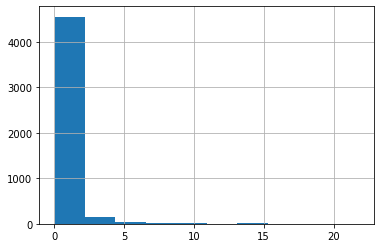

In [53]:
# histograma
games1['total_sales'].hist()
plt.show()

In [54]:
# calculando limites para dados extremos de vendas
limits(x=games1['total_sales'])

[-0.52, 1.0]

In [55]:
# retirando valores extremos
upper = limits(x=games1['total_sales'])[1]
games1_lim = games1.query("total_sales < @upper")

**Comentário**: Distribuição assimétrica com alguns poucos extremos (sucessos de venda!). Esses valores podem esconder padrões gerais, por isso retirei os mesmos para as análises seguintes.

#### Vendas por plataforma

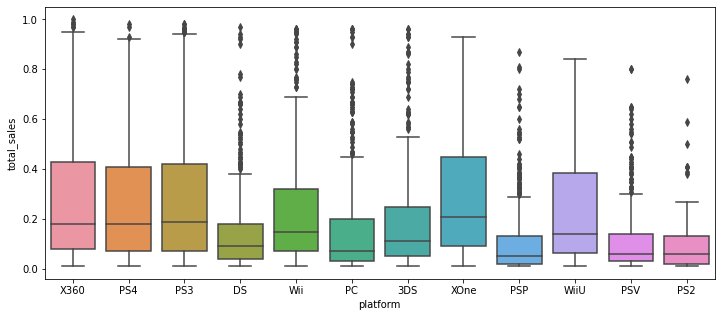

In [56]:
# Diagrama de caixa de vendas por plataforma (sem extremos)
plt.figure(figsize=(12,5))
box = sbn.boxplot(data=games1_lim, x='platform', y='total_sales')
plt.show()

In [57]:
# vendas medianas por plataforma
games1_lim.groupby(['platform'])['total_sales'].mean().sort_values(ascending=False)

platform
XOne    0.283898
X360    0.279663
PS3     0.278420
PS4     0.277904
WiiU    0.244957
Wii     0.233627
3DS     0.190643
PC      0.162775
DS      0.147202
PS2     0.135333
PSV     0.118398
PSP     0.106808
Name: total_sales, dtype: float64

**Comentário**: Os jogos para a plataforma XOne retornaram os maiores valores de venda. Contudo, a diferença entre os os valores é pouco pronunciada entre as cinco plataformas que mais venderam. Os consoles provavelemnte tem pouco efeito sobre as vendas.

### Analisando a relação entre avaliação dos jogos e total de vendas

Eu primeiramente vou usar os dados referentes a plataforma com mais vendas, XOne, para analisar a relação entre avaliação dos jogos e o total de vendas. Posteriormente, eu estenderei a análise a outras plataformas para verificar a generalidade dos padrões.

#### Verificando distribuição de vendas de jogos para XOne

In [58]:
# selecionando uma plataforma
xone = games1.query("platform == 'XOne' ")

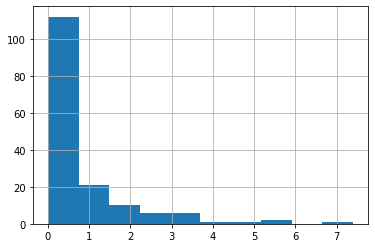

In [59]:
xone['total_sales'].hist()
plt.show()

In [60]:
# calculando limites para dados extremos de vendas
limits(x=xone['total_sales'])

[-1.3812500000000005, 2.6487500000000006]

In [61]:
# retirando valores extremos
upper = limits(x=xone['total_sales'])[1]
xone_lim = xone.query("total_sales < @upper")

**Comentário**: Retirei valores de vendas extrematente altos que podem esconder padrões gerais de correlação.

#### Verificando relações entre avaliação e total de vendas em XOne

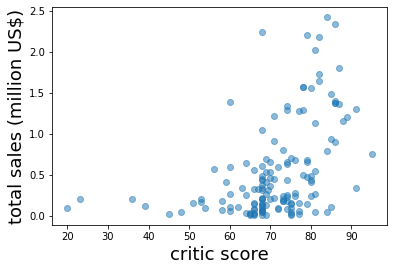

In [62]:
plt.scatter(x= xone_lim['critic_score'], y= xone_lim['total_sales'], alpha= 0.5)
plt.xlabel(xlabel='critic score', fontsize=18)
plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
plt.show()

In [63]:
# correlação
xone_lim[['total_sales','critic_score']].corr()

,total_sales,critic_score
total_sales,1.00000,0.45561
critic_score,0.45561,1.00000


**Comentário**: Correlação considerável entre `critic_score` e total de vendas.

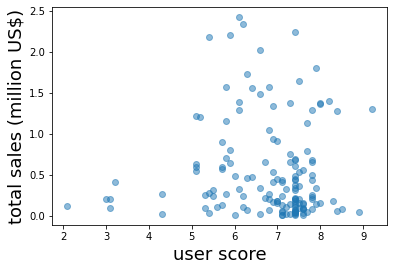

In [64]:
#  scatter plot
plt.scatter(x= xone_lim['user_score'], y= xone_lim['total_sales'], alpha= 0.5)
plt.xlabel(xlabel='user score', fontsize=18)
plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
plt.show()

In [65]:
# correlação
xone_lim[['total_sales','user_score']].corr()

,total_sales,user_score
total_sales,1.000000,-0.038683
user_score,-0.038683,1.000000


**Comentário**: Correlação desprezível entre `user_score` e total de vendas.

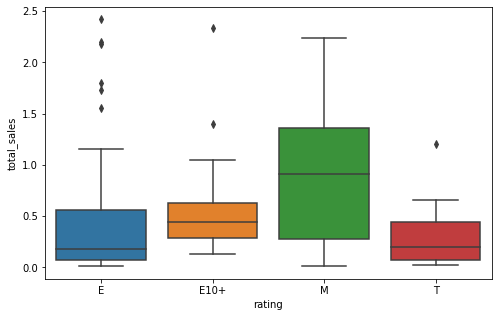

In [66]:
# box-plot vendas ~ categorias de avaliação
plt.figure(figsize=(8,5))
box = sbn.boxplot(data=xone_lim, x='rating', y='total_sales')
plt.show()

In [67]:
# valores médios de vendas por categoria de avaliação.
xone_lim.groupby(['rating'])['total_sales'].mean().sort_values(ascending= False)

rating
M       0.887297
E10+    0.559130
E       0.486585
T       0.261778
Name: total_sales, dtype: float64

**Comentário**: As avaliações pela critíca (`critic_score`) possuem uma associação considerável com o total de vendas dos jogos. As categorias de `rating` também predizem diferenças acentuadas de vendas, especificamente a categoria 'M'. Contudo, a avaliação pelos usuário (`user_score`) não consegue informar sobre o total de vendas.

#### Verificando relações entre avaliação e total de vendas em outros plataformas

In [68]:
# definindo função para reportar padrões de associação entre total de vendas e avaliaçaõ dos jogos
def fast_sales_by_evalation(df):
    ### limpando
    upper = limits(x=df['total_sales'])[1]
    df_lim = df.query("total_sales < @upper")
    ### plotando scatter vendas ~ critic
    plt.figure(figsize=(8,4))
    plt.scatter(x= df_lim['critic_score'], y= df_lim['total_sales'], alpha= 0.5)
    plt.xlabel(xlabel='critic score', fontsize=18)
    plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
    plt.show()
    # correlação
    cor1 = df_lim[['total_sales','critic_score']].corr().iloc[0][1]
    print("Correlação com 'critic_score': "+ str(round(cor1, 2)))
    ### plotando scatter vendas ~ user
    plt.figure(figsize=(8,4))
    plt.scatter(x= df_lim['user_score'], y= df_lim['total_sales'], alpha= 0.5)
    plt.xlabel(xlabel='user score', fontsize=18)
    plt.ylabel(ylabel='total sales (million US$)', fontsize=18)
    plt.show()
    # correlação
    cor2 = df_lim[['total_sales','user_score']].corr().iloc[0][1]
    print("Correlação com 'user_score': "+ str(round(cor2, 2)))
    ### plotando boxplot
    plt.figure(figsize=(8,4))
    box = sbn.boxplot(data=df_lim, x='rating', y='total_sales')
    plt.show()

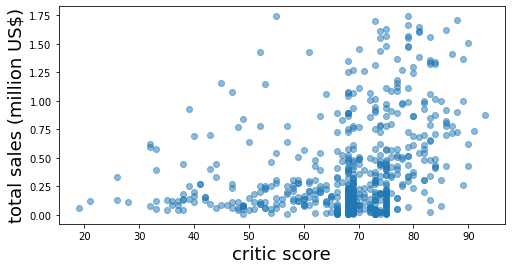

Correlação com 'critic_score': 0.32


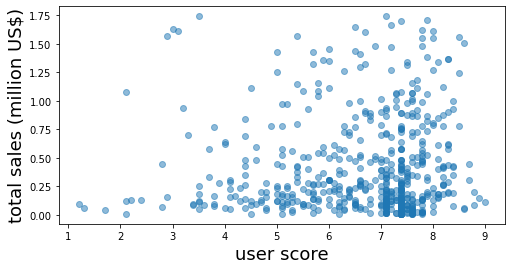

Correlação com 'user_score': 0.02


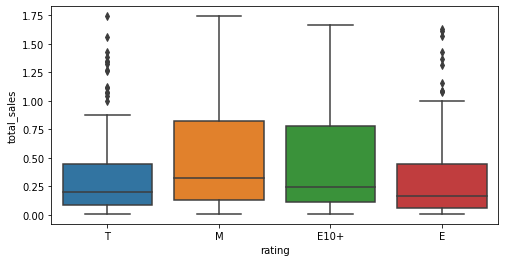

In [69]:
# avaliando X360
x360 = games1.query("platform == 'X360'")
fast_sales_by_evalation(df=x360)

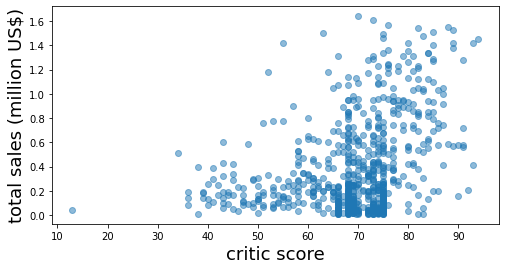

Correlação com 'critic_score': 0.36


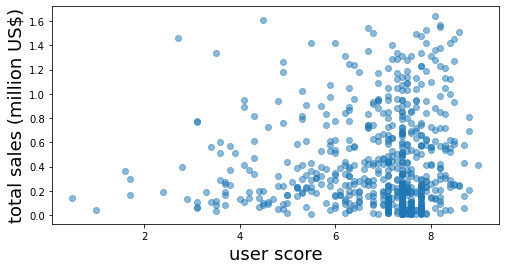

Correlação com 'user_score': 0.01


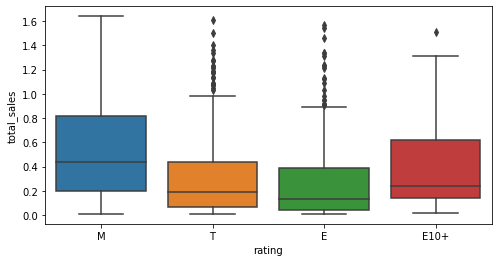

In [70]:
# avaliando PS3
ps3 = games1.query("platform == 'PS3'")
fast_sales_by_evalation(df=ps3)

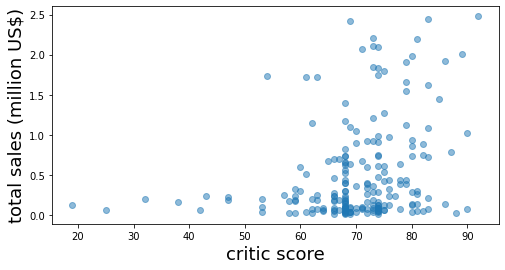

Correlação com 'critic_score': 0.29


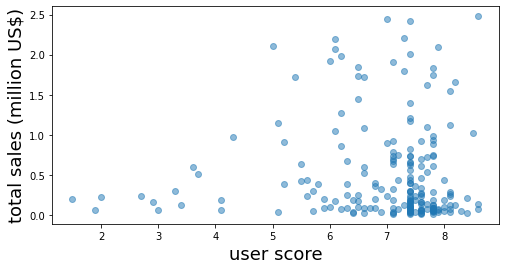

Correlação com 'user_score': -0.0


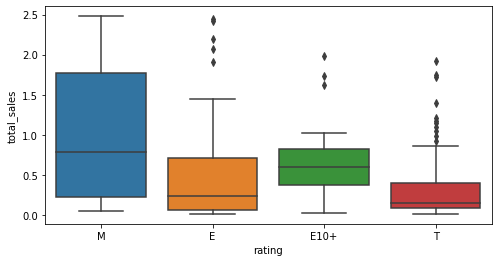

In [71]:
# avaliando PS4
ps4 = games1.query("platform == 'PS4'")
fast_sales_by_evalation(df=ps4)

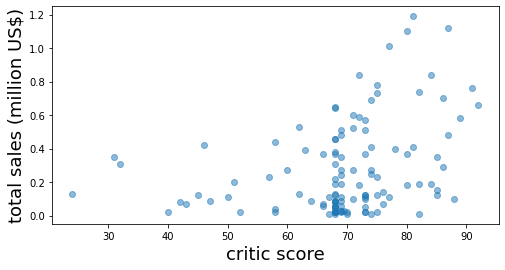

Correlação com 'critic_score': 0.33


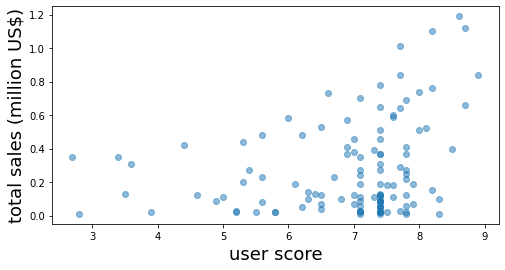

Correlação com 'user_score': 0.26


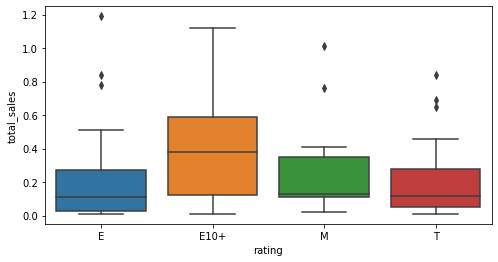

In [72]:
# avaliando WiiU
wiiu = games1.query("platform == 'WiiU'")
fast_sales_by_evalation(df=wiiu)

**Conclusão**: As conclusões feitas sobre as vendas de XOne se mantiveram na maioria dos consoles. A avaliação da crítica (`critic_score`) tem uma correlação positiva com o total de vendas. A categoria 'M' de `rating` estava associada a maiores vendas. A avaliaçaõ dos usuários (`user_score`) não é informativa para inferir o total de vendas. 

Para os jogos de WiiU, a avaliação dos usuários (`user_score`) teve uma correlação positiva com o total de vendas, e a categoria 'E10+' de `rating` estava associada a maiores vendas

### Analisando a relação entre gênero do jogo e total de vendas

Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas?

In [73]:
# definindo função para avaliar o total de vendas por gênero de jogo
def fast_sales_by_genre(df):
    ### limpando
    limits(x=df['total_sales'])
    upper = limits(x=df['total_sales'])[1]
    df_lim = df.query("total_sales < @upper")
    ### plotando boxplot
    plt.figure(figsize=(12,6))
    box = sbn.boxplot(data=df_lim, x='genre', y='total_sales')
    plt.show()
    ### ordenando vendas por plataforma
    print(df_lim.groupby(['genre'])['total_sales'].describe().sort_values(by= 'mean', ascending= False).head(5))

#### Analisando a relação nos dados gerais

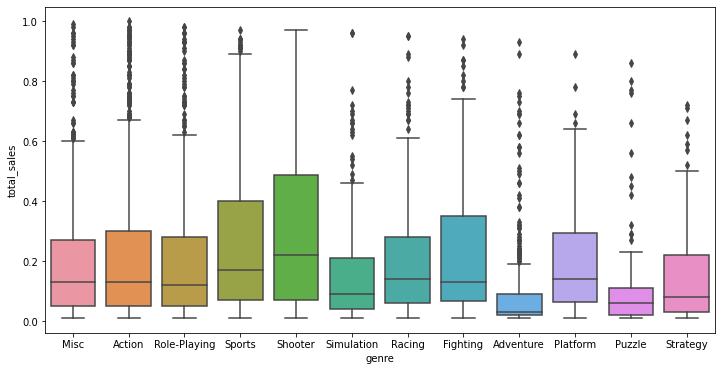

           count      mean       std   min     25%   50%     75%   max

genre                                                                 

Shooter    266.0  0.306429  0.268680  0.01  0.0700  0.22  0.4875  0.97

Sports     454.0  0.257863  0.246695  0.01  0.0700  0.17  0.4000  0.97

Fighting   164.0  0.242195  0.235976  0.01  0.0675  0.13  0.3500  0.94

Racing     183.0  0.226339  0.225998  0.01  0.0600  0.14  0.2800  0.95

Action    1161.0  0.218699  0.229773  0.01  0.0500  0.13  0.3000  1.00


In [74]:
# avaliando todo o conjunto de dados
fast_sales_by_genre(df=games1)

**Comentário**: Baseado nos dados gerais, os gêneros de maior venda são, em ordem descrescente: 'Shooter', 'Sports', 'Platform', 'Racing', 'Action'.

#### Analisando a relação nas plataformas com maior venda

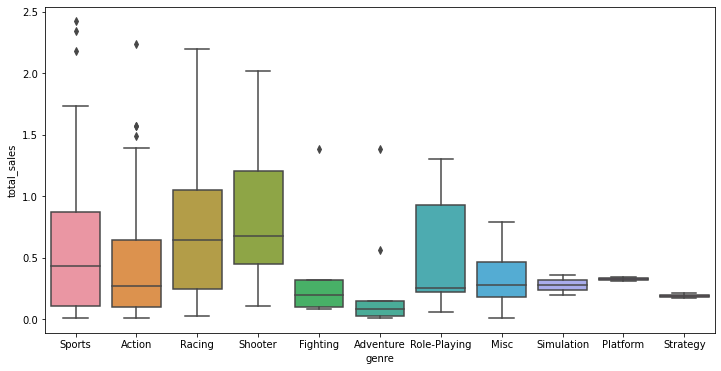

              count      mean       std   min     25%    50%     75%   max

genre                                                                     

Shooter        14.0  0.863571  0.569934  0.11  0.4475  0.680  1.2075  2.02

Racing         11.0  0.755455  0.730512  0.03  0.2450  0.640  1.0500  2.20

Sports         26.0  0.665385  0.763996  0.01  0.1100  0.435  0.8750  2.42

Role-Playing    9.0  0.556667  0.501722  0.06  0.2200  0.250  0.9300  1.30

Action         50.0  0.478800  0.530027  0.01  0.1025  0.270  0.6475  2.24


In [75]:
# avaliando XOne
fast_sales_by_genre(df=xone)

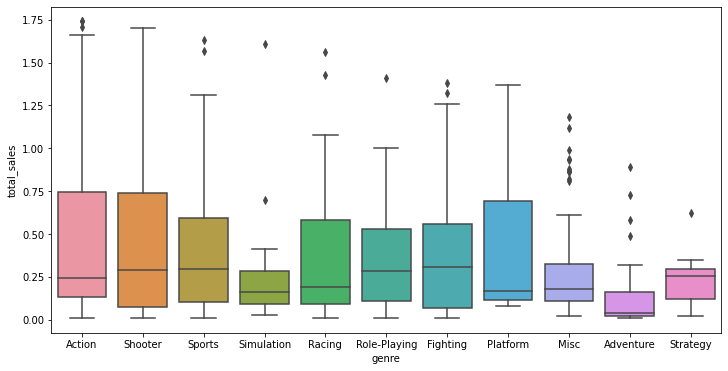

          count      mean       std   min     25%    50%     75%   max

genre                                                                 

Shooter    87.0  0.470000  0.476865  0.01  0.0750  0.290  0.7400  1.70

Action    170.0  0.463294  0.472146  0.01  0.1300  0.245  0.7450  1.74

Platform   10.0  0.463000  0.512598  0.08  0.1125  0.165  0.6925  1.37

Sports     86.0  0.400233  0.373297  0.01  0.1025  0.295  0.5950  1.63

Fighting   39.0  0.384872  0.384050  0.01  0.0700  0.310  0.5600  1.38


In [76]:
#Avaliando X360
fast_sales_by_genre(df=x360)

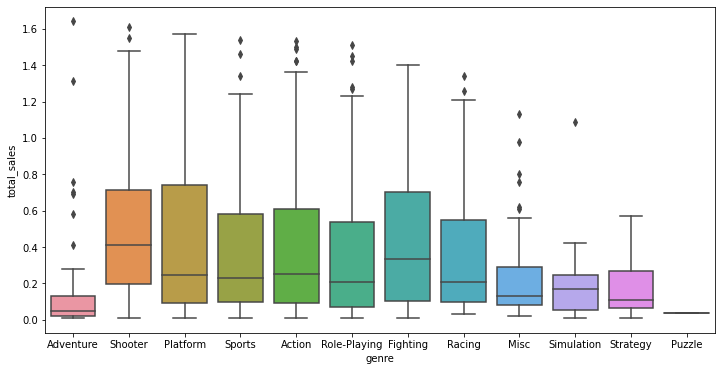

          count      mean       std   min     25%    50%    75%   max

genre                                                                

Shooter    79.0  0.507468  0.408890  0.01  0.1950  0.410  0.715  1.61

Platform   20.0  0.473500  0.451375  0.01  0.0925  0.245  0.740  1.57

Fighting   54.0  0.439815  0.397485  0.01  0.1025  0.335  0.700  1.40

Racing     45.0  0.394889  0.390307  0.03  0.1000  0.210  0.550  1.34

Action    238.0  0.389916  0.384612  0.01  0.0900  0.250  0.610  1.53


In [77]:
# Avaliando PS3
fast_sales_by_genre(df=ps3)

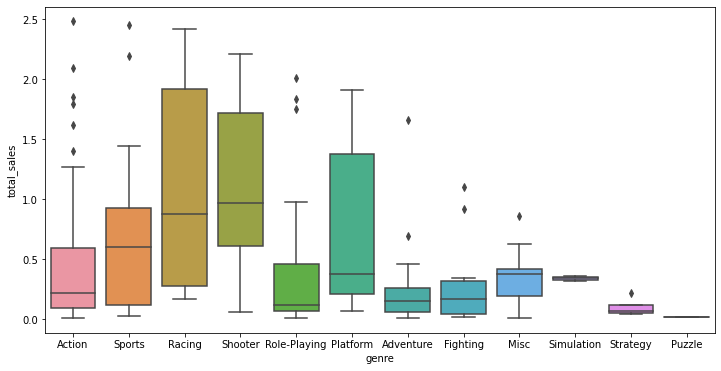

          count      mean       std   min   25%    50%    75%   max

genre                                                              

Shooter    13.0  1.101538  0.737347  0.06  0.61  0.970  1.720  2.21

Racing     10.0  1.095000  0.878398  0.17  0.28  0.875  1.915  2.42

Platform    7.0  0.790000  0.769762  0.07  0.21  0.380  1.375  1.91

Sports     25.0  0.650000  0.663721  0.03  0.12  0.600  0.930  2.45

Action     74.0  0.431081  0.523941  0.01  0.09  0.220  0.590  2.48


In [78]:
# Avaliando PS4
fast_sales_by_genre(df=ps4)

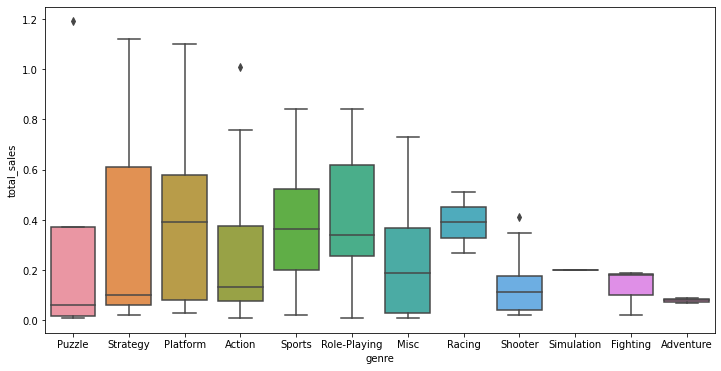

              count      mean       std   min     25%    50%    75%   max

genre                                                                    

Strategy        3.0  0.413333  0.613297  0.02  0.0600  0.100  0.610  1.12

Role-Playing    6.0  0.411667  0.306099  0.01  0.2550  0.340  0.620  0.84

Sports          8.0  0.395000  0.291302  0.02  0.2025  0.365  0.525  0.84

Racing          2.0  0.390000  0.169706  0.27  0.3300  0.390  0.450  0.51

Platform        9.0  0.387778  0.363964  0.03  0.0800  0.390  0.580  1.10


In [79]:
# Avaliando wiiu
fast_sales_by_genre(df=wiiu)

**Comentário**: Os jogos tipo "Sports" figura entre os mais vendidos na maioria das plataformas mais populares, sendo então um gênero de sucesso. Em seguida estão os gêneros "Platform", "Shooter" e "Racing". Esses gêneros são os mesmos apontados como os mais vendidos nos dados gerais, sendo portanto uma boa aposta para vendas.

## Perfil de usuários por região

### Analisando vendas das principiais plataformas por região

In [80]:
def fast_sales_by_region(df):
    ### concatenando valores dar regiões
    all_sales = df['na_sales'].append(df['eu_sales']).append(df['jp_sales'])
    ### limpando
    upper = limits(x=all_sales)[1]
    df_lim = df.query("na_sales < @upper")
    df_lim = df_lim.query("eu_sales < @upper")
    df_lim = df_lim.query("jp_sales < @upper")
    ### plotando boxplot
    plt.figure(figsize=(8,5))
    df_lim.boxplot(column=['na_sales', 'eu_sales', 'jp_sales'], grid=False)
    plt.xlabel(xlabel='region', fontsize=18)
    plt.ylabel(ylabel='sales (million US$)', fontsize=18)
    plt.show()
    ### ordenando vendas por plataforma
    print(df_lim[['na_sales', 'eu_sales', 'jp_sales' ]].describe() )

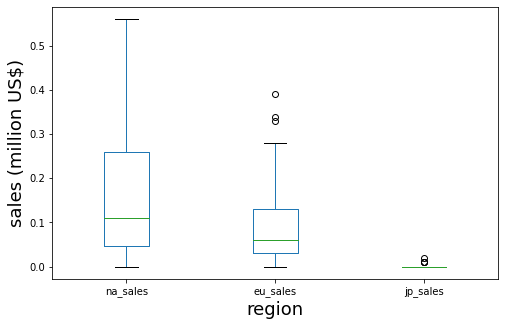

         na_sales    eu_sales    jp_sales

count  116.000000  116.000000  116.000000

mean     0.156724    0.092586    0.000517

std      0.132939    0.085528    0.002586

min      0.000000    0.000000    0.000000

25%      0.047500    0.030000    0.000000

50%      0.110000    0.060000    0.000000

75%      0.260000    0.130000    0.000000

max      0.560000    0.390000    0.020000


In [81]:
# vendas de XOne
fast_sales_by_region(df=xone)

**Comentário**: Para XOne, o valor médio de vendas é maior na América do Norte.

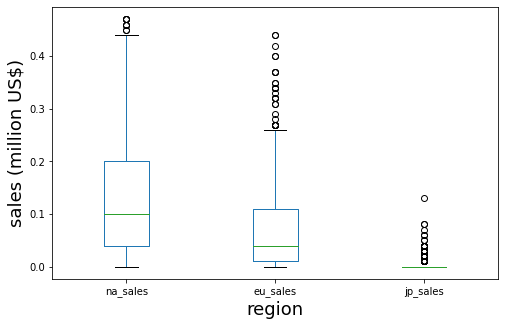

         na_sales    eu_sales    jp_sales

count  497.000000  497.000000  497.000000

mean     0.135473    0.075211    0.005231

std      0.123315    0.088850    0.012873

min      0.000000    0.000000    0.000000

25%      0.040000    0.010000    0.000000

50%      0.100000    0.040000    0.000000

75%      0.200000    0.110000    0.000000

max      0.470000    0.440000    0.130000


In [82]:
# vendas de X360
fast_sales_by_region(df=x360)

**Comentário**: Para X360, o valor médio de vendas é maior na América do Norte

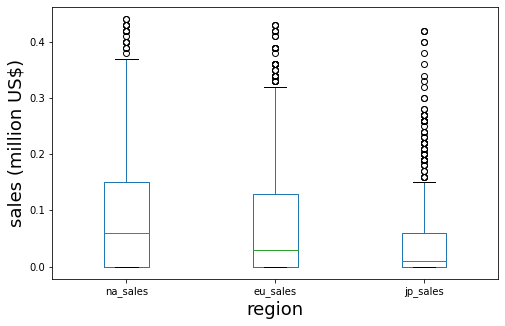

         na_sales    eu_sales    jp_sales

count  676.000000  676.000000  676.000000

mean     0.094852    0.080207    0.047500

std      0.110768    0.104703    0.077501

min      0.000000    0.000000    0.000000

25%      0.000000    0.000000    0.000000

50%      0.060000    0.030000    0.010000

75%      0.150000    0.130000    0.060000

max      0.440000    0.430000    0.420000


In [83]:
# vendas de PS3
fast_sales_by_region(df=ps3)

**Comentário**: Para PS3, o valor médio de vendas é maior na América do Norte.

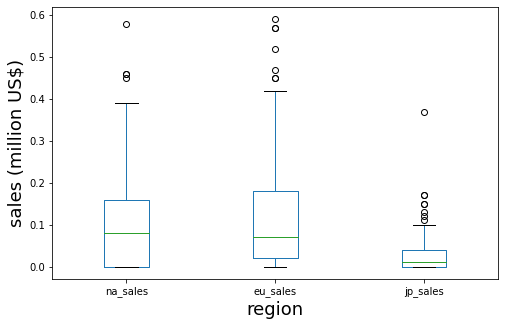

         na_sales    eu_sales    jp_sales

count  171.000000  171.000000  171.000000

mean     0.105146    0.123509    0.027427

std      0.121454    0.139846    0.044581

min      0.000000    0.000000    0.000000

25%      0.000000    0.020000    0.000000

50%      0.080000    0.070000    0.010000

75%      0.160000    0.180000    0.040000

max      0.580000    0.590000    0.370000


In [84]:
# vendas PS4
fast_sales_by_region(df=ps4)

**Comentário**: Para PS4, o valor médio de vendas é maior na Europa.

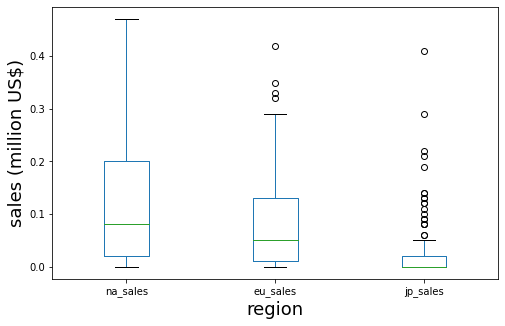

         na_sales    eu_sales    jp_sales

count  117.000000  117.000000  117.000000

mean     0.123846    0.087607    0.028632

std      0.120615    0.096389    0.063272

min      0.000000    0.000000    0.000000

25%      0.020000    0.010000    0.000000

50%      0.080000    0.050000    0.000000

75%      0.200000    0.130000    0.020000

max      0.470000    0.420000    0.410000


In [85]:
# vendas WiiU
fast_sales_by_region(df=wiiu)

**Comentário**: Para WiiU, o valor médio de vendas é maior na América do Norte.

**Comentário geral**: O valor médio de vendas é maior na América do Norte para a maioria das plataformas. A Europa é o segundo melhor mercado, seguido do Japão.

### Analisando jogos mais vendidos em cada região

In [86]:
def fast_sales_by_group(df, var, group):
    ### limpando
    upper = limits(x=df[var])[1]
    df_lim = df[(df[var] < upper)]
    ### plotando boxplot
    plt.figure(figsize=(12,6))
    box = sbn.boxplot(data=df_lim, x=group, y=var)
    plt.show()
    ### ordenando vendas por plataforma
    print( df_lim.groupby([group])[var].describe().sort_values(by='mean', ascending=False) )

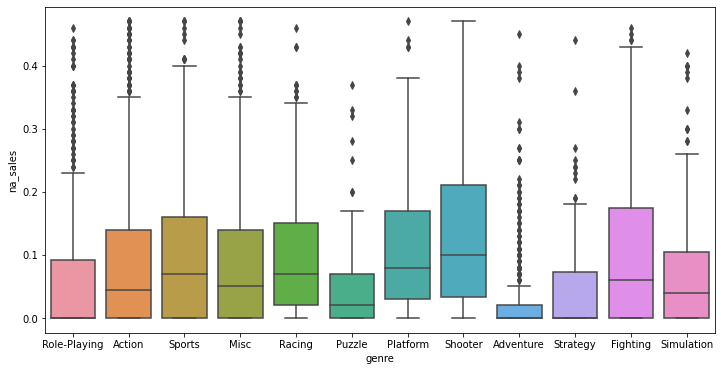

               count      mean       std  min     25%    50%     75%   max

genre                                                                     

Shooter        266.0  0.133910  0.123431  0.0  0.0325  0.100  0.2100  0.47

Platform       107.0  0.112523  0.113313  0.0  0.0300  0.080  0.1700  0.47

Fighting       167.0  0.108623  0.127784  0.0  0.0000  0.060  0.1750  0.46

Sports         439.0  0.104624  0.121265  0.0  0.0000  0.070  0.1600  0.47

Racing         192.0  0.102135  0.107592  0.0  0.0200  0.070  0.1500  0.46

Misc           501.0  0.091677  0.113110  0.0  0.0000  0.050  0.1400  0.47

Action        1162.0  0.088434  0.113623  0.0  0.0000  0.045  0.1400  0.47

Simulation     183.0  0.070656  0.095461  0.0  0.0000  0.040  0.1050  0.42

Role-Playing   460.0  0.067261  0.108020  0.0  0.0000  0.000  0.0925  0.46

Puzzle         109.0  0.048440  0.073713  0.0  0.0000  0.020  0.0700  0.37

Strategy       152.0  0.044145  0.077864  0.0  0.0000  0.000  0.0725  0.44

Adventure   

In [87]:
# Na América do Norte
fast_sales_by_group(df= games1, var= 'na_sales', group='genre')

**Comentário**: Na América do Norte, o gênero de jogo 'Shoorter' possui a maior média de venda, seguido de 'Platform' e 'Fighting'.

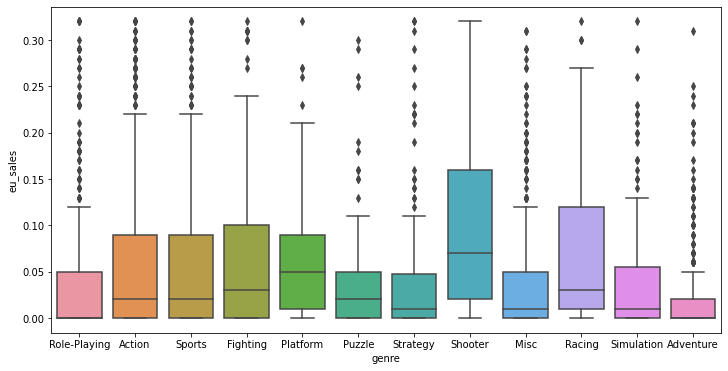

               count      mean       std  min   25%   50%     75%   max

genre                                                                  

Shooter        249.0  0.098554  0.092977  0.0  0.02  0.07  0.1600  0.32

Racing         167.0  0.071377  0.080135  0.0  0.01  0.03  0.1200  0.32

Platform       101.0  0.066238  0.070340  0.0  0.01  0.05  0.0900  0.32

Fighting       169.0  0.063550  0.084855  0.0  0.00  0.03  0.1000  0.32

Sports         460.0  0.058478  0.078894  0.0  0.00  0.02  0.0900  0.32

Action        1134.0  0.057240  0.076629  0.0  0.00  0.02  0.0900  0.32

Strategy       150.0  0.043267  0.074189  0.0  0.00  0.01  0.0475  0.32

Simulation     179.0  0.040335  0.062674  0.0  0.00  0.01  0.0550  0.32

Role-Playing   462.0  0.040260  0.071655  0.0  0.00  0.00  0.0500  0.32

Misc           502.0  0.039622  0.063091  0.0  0.00  0.01  0.0500  0.31

Puzzle         109.0  0.038807  0.063095  0.0  0.00  0.02  0.0500  0.30

Adventure      495.0  0.019394  0.043927  0.0  0.00

In [88]:
# Na Europa
fast_sales_by_group(df= games1, var= 'eu_sales', group='genre')

**Comentário**: Na Europa, o gênero de jogo 'Shoorter' possui a maior média de venda, seguido de 'Racing' e 'Platform'.

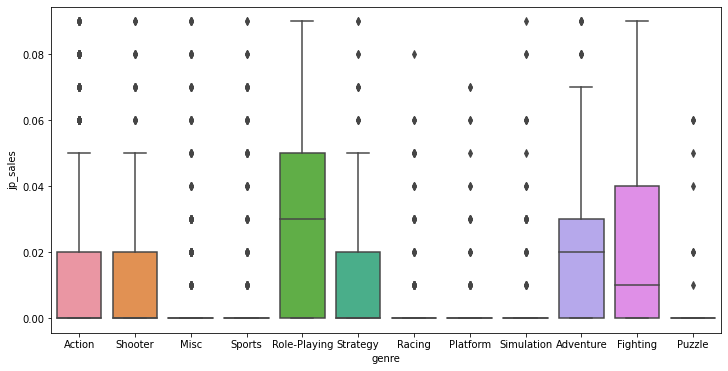

               count      mean       std  min  25%   50%   75%   max

genre                                                               

Role-Playing   325.0  0.031138  0.028201  0.0  0.0  0.03  0.05  0.09

Fighting       150.0  0.022733  0.027414  0.0  0.0  0.01  0.04  0.09

Adventure      482.0  0.020041  0.021034  0.0  0.0  0.02  0.03  0.09

Action        1122.0  0.014661  0.023287  0.0  0.0  0.00  0.02  0.09

Strategy       134.0  0.012836  0.022499  0.0  0.0  0.00  0.02  0.09

Shooter        332.0  0.012801  0.022225  0.0  0.0  0.00  0.02  0.09

Misc           484.0  0.009153  0.020478  0.0  0.0  0.00  0.00  0.09

Simulation     180.0  0.006889  0.016487  0.0  0.0  0.00  0.00  0.09

Sports         468.0  0.006474  0.017662  0.0  0.0  0.00  0.00  0.09

Platform       116.0  0.006379  0.014826  0.0  0.0  0.00  0.00  0.07

Racing         207.0  0.006087  0.014267  0.0  0.0  0.00  0.00  0.08

Puzzle         101.0  0.003366  0.012270  0.0  0.0  0.00  0.00  0.06


In [89]:
# No Japão
fast_sales_by_group(df= games1, var= 'jp_sales', group='genre')

**Comentário**: No Japão, o gênero de jogo 'Role_Playing' possui a maior média de venda, seguido de 'Fighting' e 'Adventure'.

**Comentário geral**: Os gêneros de jogos mais vendidos tendem a serem similares entre América do Norte e Europa, onde 'Shooter' e 'Platform' posicionam entre os gêneros com maior média de vendas. O perfil muda no Japão, onde 'Role_Playing' , 'Fighting' e 'Adventure' posicionam entre os gêneros com maior média de vendas. Esta diferença entre os mercados ocidentais e o Japão provavelmente reflete diferenças culturais entre as regiões.

### Analisando efeito da avaliação sobre a venda de jogos de cada região

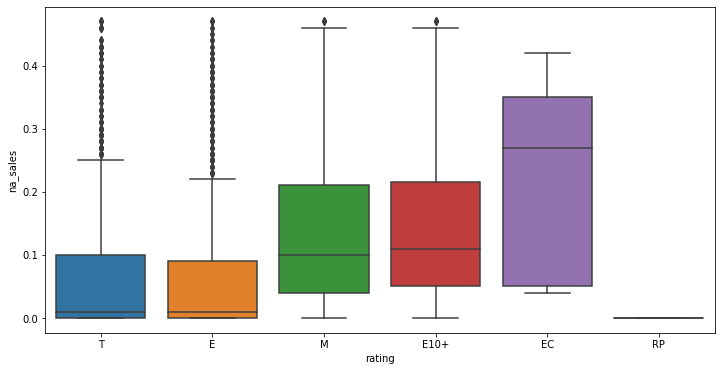

         count      mean       std   min   25%   50%    75%   max

rating                                                           

EC         5.0  0.226000  0.173580  0.04  0.05  0.27  0.350  0.42

E10+     475.0  0.139495  0.119863  0.00  0.05  0.11  0.215  0.47

M        508.0  0.138465  0.130790  0.00  0.04  0.10  0.210  0.47

T       1584.0  0.066660  0.101254  0.00  0.00  0.01  0.100  0.47

E       1664.0  0.063468  0.097906  0.00  0.00  0.01  0.090  0.47

RP         1.0  0.000000       NaN  0.00  0.00  0.00  0.000  0.00


In [90]:
# vendas na América do Norte
fast_sales_by_group(df= games1, var= 'na_sales', group='rating')

**Comentário**: Jogos avaliados em EC possuem a maior média de vendas na América do Norte, seguido por E10+.

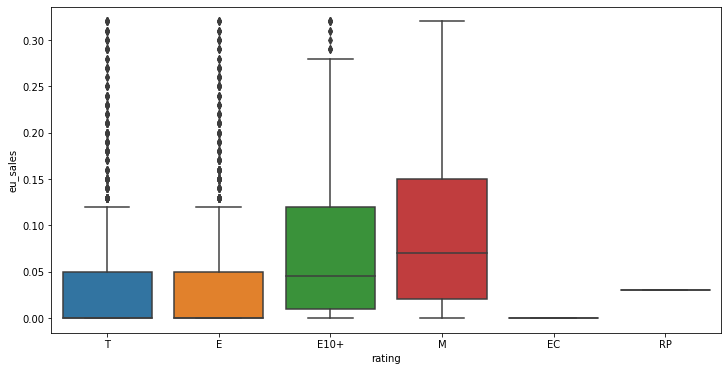

         count      mean       std   min   25%    50%   75%   max

rating                                                           

M        475.0  0.097179  0.087265  0.00  0.02  0.070  0.15  0.32

E10+     462.0  0.077035  0.081688  0.00  0.01  0.045  0.12  0.32

T       1572.0  0.041654  0.068789  0.00  0.00  0.000  0.05  0.32

E       1662.0  0.038791  0.066086  0.00  0.00  0.000  0.05  0.32

RP         1.0  0.030000       NaN  0.03  0.03  0.030  0.03  0.03

EC         5.0  0.000000  0.000000  0.00  0.00  0.000  0.00  0.00


In [91]:
# vendas na Europa
fast_sales_by_group(df= games1, var= 'eu_sales', group='rating')

**Comentário**: Jogos avaliados em M possuem a maior média de vendas na Europa, seguido por E10+.

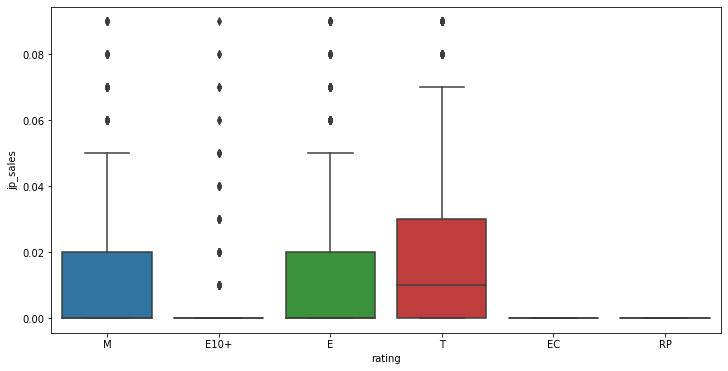

         count      mean       std  min  25%   50%   75%   max

rating                                                        

T       1337.0  0.019948  0.025933  0.0  0.0  0.01  0.03  0.09

M        607.0  0.015140  0.023748  0.0  0.0  0.00  0.02  0.09

E       1633.0  0.011555  0.020323  0.0  0.0  0.00  0.02  0.09

E10+     518.0  0.003707  0.012115  0.0  0.0  0.00  0.00  0.09

EC         5.0  0.000000  0.000000  0.0  0.0  0.00  0.00  0.00

RP         1.0  0.000000       NaN  0.0  0.0  0.00  0.00  0.00


In [92]:
# vendas no Japão
fast_sales_by_group(df= games1, var= 'jp_sales', group='rating')

**Comentário**: Jogos avaliados em T possuem a maior média de vendas no Japão, seguido por E.

**Comentário gearal**: A avaliação dos jogos é um improtante preditor de vendas em cada região. Diferentes categorias de avaliação possuem as maiores médias de vendas em cada região, possivelmente refletindo diferenças culturais que influenciam na compra dos jogos em cada região.

## Testando hipóteses

### Testando se a avaliação dos usuários difere entre  as plataformas XOne e PC

Testando se a avaliação média dos usuários difere entre as plataformas XOne e PC:

1. Hipótese nula: Não existe diferença na avaliação média dos usuários entre as plataformas XOne e PC
2. Hipótese alternativa: Existe diferença na avaliação média dos usuários entre as plataformas XOne e PC

In [93]:
# Separando scores por plataforma
xone_user_scores = games1.query("platform == 'XOne' ")['user_score']
pc_user_scores = games1.query("platform == 'PC' ")['user_score']

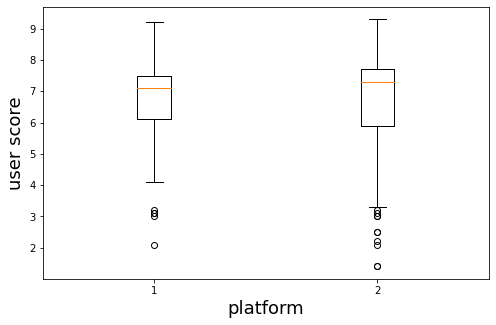

In [94]:
# boxplot
plt.figure(figsize=(8,5))
plt.boxplot([xone_user_scores, pc_user_scores])
plt.xlabel(xlabel='platform', fontsize=18)
plt.ylabel(ylabel='user score', fontsize=18)
plt.show()

**Comentário**: Variação parecida dos dois grupos. 

In [95]:
print("Avaliação média dos usuários para XOne:", round(np.mean(xone_user_scores ),2) )
print("Avaliação média dos usuários para PC:", round(np.mean(pc_user_scores ),2) )

Avaliação média dos usuários para XOne: 6.75

Avaliação média dos usuários para PC: 6.76


In [96]:
# definindo alfa
alpha = 0.05

In [97]:
# Teste as hipóteses
ttest_1 = st.ttest_ind(xone_user_scores, pc_user_scores , equal_var = True)
print('p-value:', round(ttest_1.pvalue, 3) )

p-value: 0.899


**Comentário**: Utilizei um teste-t com amostra

In [98]:
if ttest_1.pvalue < alpha:
    print("Hipótese nula rejeitada")
else:
    print("Hipótese nula mantida")

Hipótese nula mantida


**Conclusão**: A avalição média dos usuários não difere entre as plataformas XOne e PC.

### Testando se a avaliação dos usuários difere entre os gêneros 'Action' e 'Sports'

Testando se a avaliação média dos usuários difere entre os gêneros 'Action' e 'Sports':

1. Hipótese nula: Não existe diferença na avaliação média dos usuários entre os gêneros 'Action' e 'Sports'
2. Hipótese alternativa: Existe diferença na avaliação média dos usuários entre os gêneros 'Action' e 'Sports'

In [99]:
# Separando scores por gênero
act_user_scores = games1.query("genre == 'Action' ")['user_score']
spt_user_scores = games1.query("genre == 'Sports' ")['user_score']

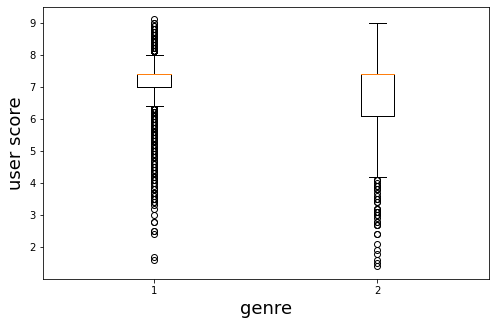

In [100]:
# boxplot
plt.figure(figsize=(8,5))
plt.boxplot([act_user_scores, spt_user_scores])
plt.xlabel(xlabel='genre', fontsize=18)
plt.ylabel(ylabel='user score', fontsize=18)
plt.show()

**Comentário**: Variação discrepante dos dois grupos.

In [101]:
print("Avaliação média dos usuários para Action:", round(np.mean(act_user_scores ),2) )
print("Avaliação média dos usuários para Sports:", round(np.mean(spt_user_scores ),2) )

Avaliação média dos usuários para Action: 7.08

Avaliação média dos usuários para Sports: 6.64


In [102]:
# definindo alfa
alpha = 0.05

In [103]:
# Teste as hipóteses
ttest_2 = st.ttest_ind(act_user_scores, spt_user_scores , equal_var = False)
print('p-value:', round(ttest_2.pvalue, 3) )

p-value: 0.0


In [104]:
if ttest_2.pvalue < alpha:
    print("Hipótese nula rejeitada")
else:
    print("Hipótese nula mantida")

Hipótese nula rejeitada


**Conclusão**: A avalição média dos usuários difere entre os gêneros 'Action' e 'Sports', sendo que o último possui uma maior média.

## Conclusão final

Eu analisei os dados de venda de videogame da loja online ICE para **identificar padrões que determinam se um jogo tem sucesso ou não**. Eu foquei em procurar padrões que direcionassem as campanhas publicitárias em 2017.

Eu tratei dados faltantes em `name`, `year`, `genre`, `critic_score`, `user_score`, e `rating`. Eu apenas eliminei as entradas com dados faltantes em `name`, `year`, `genre`, pois eram poucas entradas e não era passíveis de inferência. Eu preenchi os dados faltantes de `critic_score`,  `user_score` e `rating` a partir dos valores comuns a fim de manter a estrutura de correlação entre as variáveis

Ao analisar o efeito do tempo, eu descobri que jogos de uma dada plataformas tem um período de venda de cerca de 10 anos. Normalmente as vendas crescem nos cinco primeiros anos, decrescendo nos cinco últimos anos. Baseado nisto, decidi estudar os dados entre 2010 a 2015, ou seja, os cinco anos anteriores de 2017, afim de aumentar as chances de captar tendências crescentes para 2017. Eu exclui 2016 do intervalo pois os dados do referido ano podem não estar completos.

Das plataformas com maiores vendas recentes, PS3, X360 e 3D2 estão em tendência de queda de vendas, enquanto que PS4 está crescendo em vendas. A diferença entre os valores totais de vendas é pouco pronunciada entre as cinco plataformas que mais venderam. Os consoles provavelmente tem pouco efeito sobre as vendas.

Ao analisar o efeito da avaliação dos jogos, eu descobri que a avaliação da crítica (`critic_score`) tem uma correlação positiva com o total de vendas. A categoria 'M' de `rating` estava associada a maiores vendas. Contudo, a avaliação dos usuários (`user_score`) não é informativa para inferir o total de vendas. 

Ao analisar o efeito do gênero do jogo, eu descobri que jogos tipo "Sports" estão entre os mais vendidos na maioria das plataformas mais populares. Em seguida estão os gêneros "Platform", "Shooter" e "Racing".

Ao analisar o efeito da região, eu descobri que o valor médio de vendas é maior na América do Norte para a maioria das plataformas, seguido da Europa e Japão. Os gêneros de jogos mais vendidos tendem a serem similares entre América do Norte e Europa, onde 'Shooter' e 'Platform' retornam maiores médias de vendas. O perfil muda no Japão, onde 'Role_Playing' , 'Fighting' e 'Adventure' posicionam entre os gêneros com maior média de vendas. Esta diferença entre os mercados ocidentais e o Japão provavelmente reflete diferenças culturais entre as regiões.